In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter

input_dir = "out/"
output_dir = ""

# Load dataset
data_X = np.load(input_dir+'scBaseEncoderFeat_X.npy')
data_Y = np.load(input_dir+'scBaseEncoderFeat_Y.npy')
data = np.concatenate((data_X, data_Y), axis=0)

labels = np.load(input_dir+"lineage_info.npy")

print("data shape", data.shape)
print("labels shape", labels.shape)


# Initialize UMAP and fit your data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

data_X_reduced = embedding[:21540, :]
data_Y_reduced = embedding[21540:, :]

default_color = 'gray'

data shape (43080, 64)
labels shape (21540,)


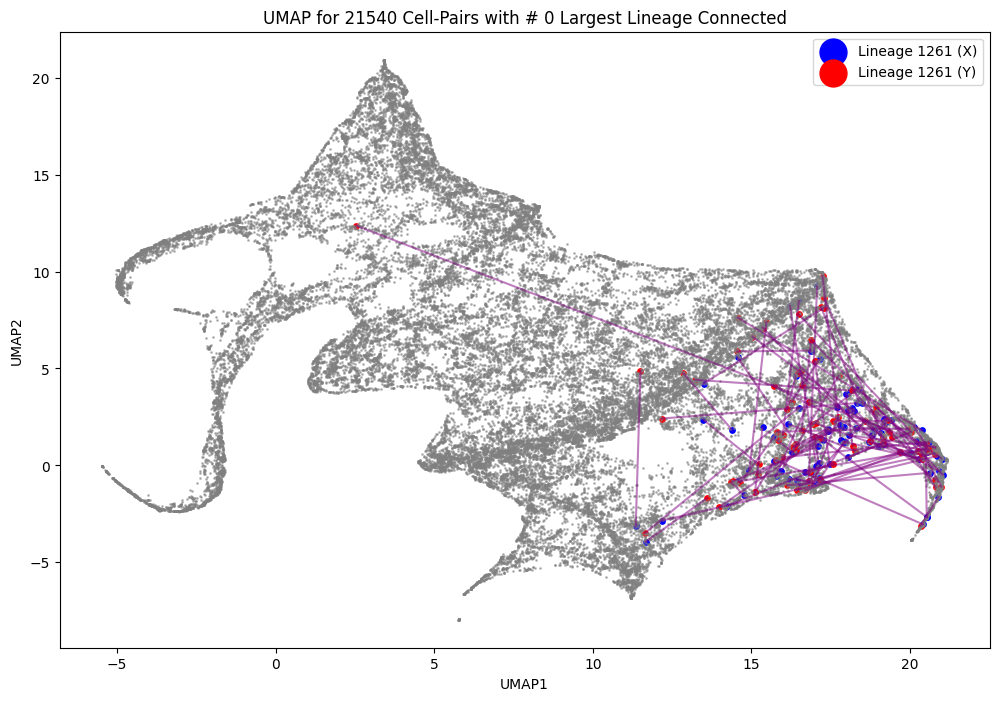

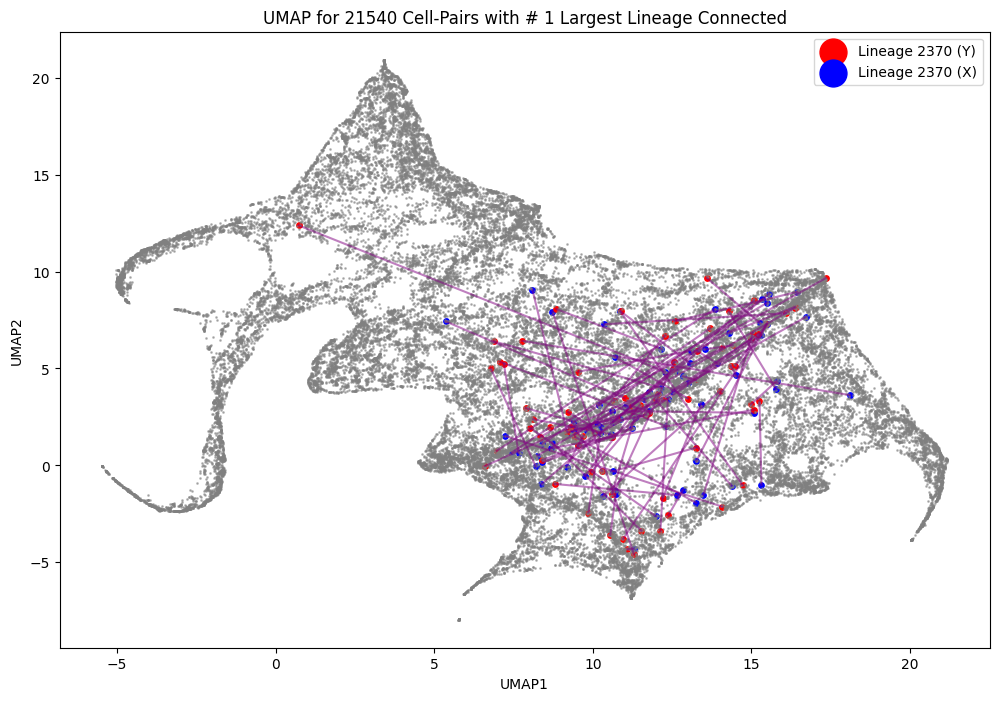

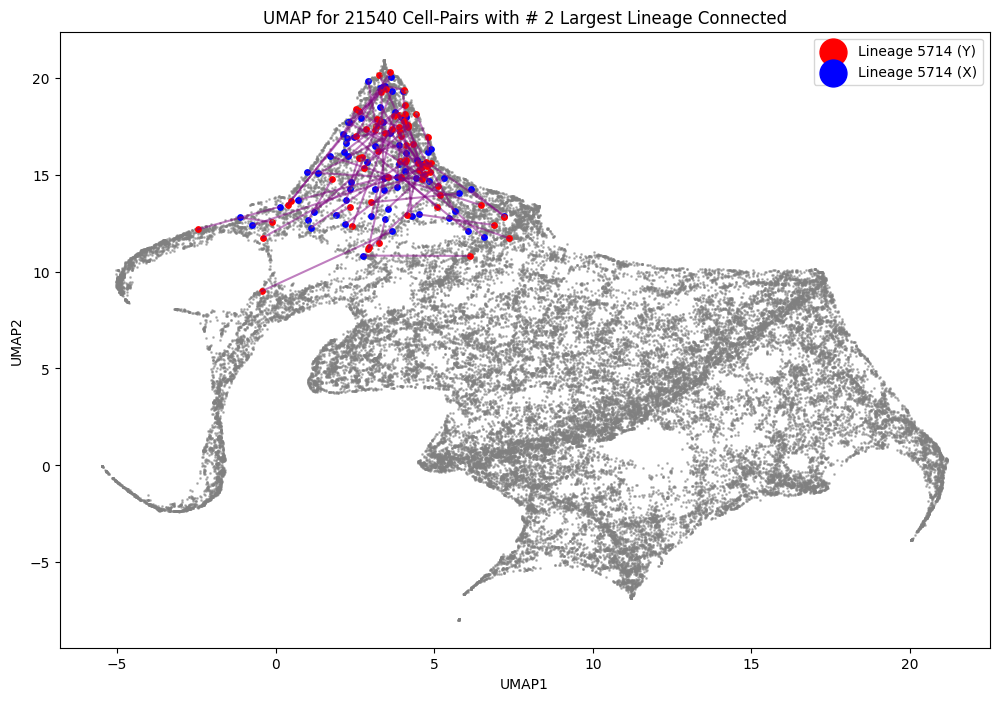

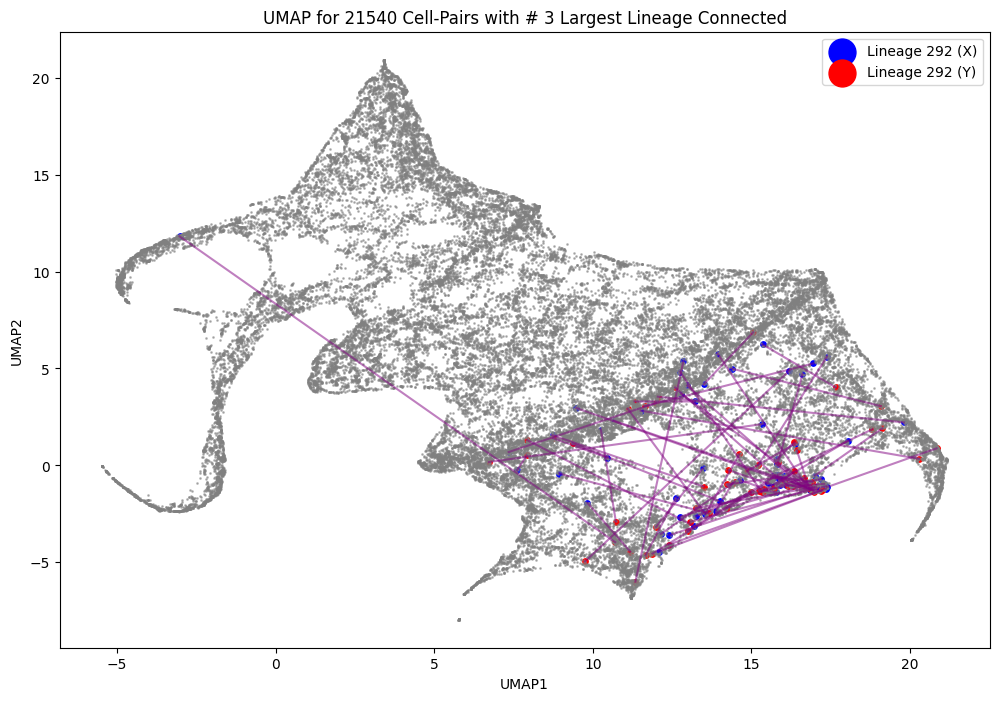

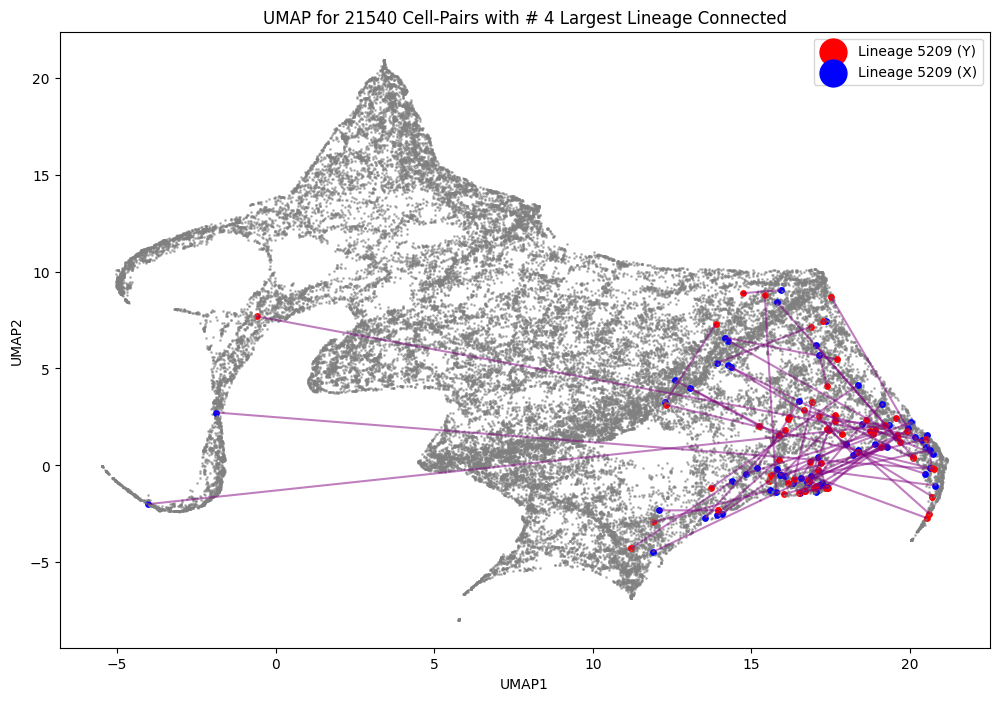

In [21]:
#plot top 5 lineages

for i in range(5):

    labels = np.load(input_dir+"lineage_info.npy")
    unique_labels, counts = np.unique(labels, return_counts=True)
    second_largest_label = unique_labels[np.argsort(-counts)[i]]

    # Adjusted plotting for only the second largest label
    plt.figure(figsize=(12, 8))

    # We loop through labels but plot only the second largest
    for label in np.unique(labels):
        subset_X = data_X_reduced[labels == label]
        subset_Y = data_Y_reduced[labels == label]
        
        if label == second_largest_label:
            # Use distinct colors for X and Y points of the second largest label
            plt.scatter(subset_X[:, 0], subset_X[:, 1], s=15, color="blue", label=f"Lineage {label} (X)")
            plt.scatter(subset_Y[:, 0], subset_Y[:, 1], s=15, color="red", label=f"Lineage {label} (Y)")
            
            # Draw lines connecting points with the same position for the second largest label
            for j in range(len(subset_X)):
                plt.plot([subset_X[j, 0], subset_Y[j, 0]], [subset_X[j, 1], subset_Y[j, 1]], color='purple', alpha=0.5)
        else:
            # Plot the rest in gray without connecting lines
            plt.scatter(subset_X[:, 0], subset_X[:, 1], s=1, color=default_color, alpha=0.5)
            plt.scatter(subset_Y[:, 0], subset_Y[:, 1], s=1, color=default_color, alpha=0.5)

    plt.title(f'UMAP for 21540 Cell-Pairs with # {i+1} Largest Lineage Connected')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')

    # Update the legend to reflect the changes
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = list(set(labels))
    unique_handles = [handles[labels.index(l)] for l in unique_labels]
    plt.legend(unique_handles, unique_labels, markerscale=5)

    plt.savefig(output_dir+f'umap_{i}_largest_plot.png', dpi=300)
    # plt.savefig('umap_second_largest_plot.svg', format='svg')
    # plt.show()
